In [1]:
import os
import random
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
cwd = os.getcwd()
os.chdir('..')
from functions import \
    similar_or_diverse, \
    split_dataset_diversity
os.chdir(cwd)

Using TensorFlow backend.


In [3]:
# load the cifar-10 data
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

In [4]:
gist_train = np.load('cifar10_gist_features_greyscale.npy')

In [5]:
images_to_sample = 16

class_to_sample = 3  # cats

# subset images to this class
x_class = x_train[y_train.flatten() == class_to_sample, :, :, :]
gist_class = gist_train[y_train.flatten() == class_to_sample, :]

In [6]:
diverse_images, similar_images, random_images, _ = split_dataset_diversity(x_class, 
                                                                           gist_class, 
                                                                           images_to_sample, 
                                                                           0)

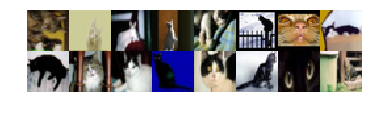

In [7]:
fig, axs = plt.subplots(2, 8, gridspec_kw={'hspace': 0, 
                                           'wspace': 0, 
                                           'top': .41})

for i in range(images_to_sample):
    if i <= 7:
        axs[0, i].imshow(diverse_images[i, :, :, :])
        axs[0, i].axis('off')
    else:
        axs[1, i - 8].imshow(diverse_images[i, :, :, :])
        axs[1, i - 8].axis('off')

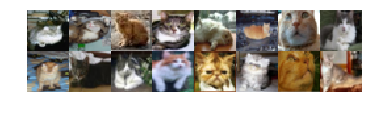

In [8]:
fig, axs = plt.subplots(2, 8, gridspec_kw={'hspace': 0, 
                                           'wspace': 0, 
                                           'top': .41})

for i in range(images_to_sample):
    if i <= 7:
        axs[0, i].imshow(similar_images[i, :, :, :])
        axs[0, i].axis('off')
    else:
        axs[1, i - 8].imshow(similar_images[i, :, :, :])
        axs[1, i - 8].axis('off')

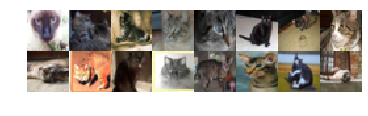

In [9]:
fig, axs = plt.subplots(2, 8, gridspec_kw={'hspace': 0, 
                                           'wspace': 0, 
                                           'top': .41})

for i in range(images_to_sample):
    if i <= 7:
        axs[0, i].imshow(random_images[i, :, :, :])
        axs[0, i].axis('off')
    else:
        axs[1, i - 8].imshow(random_images[i, :, :, :])
        axs[1, i - 8].axis('off')

In [10]:
outlier_ind = np.load('gist-greyscale-10nn-cv-removal-indices.npy')

x_train_edited = np.delete(x_train, outlier_ind, 0)
y_train_edited = np.delete(y_train, outlier_ind, 0)
x_gist_edited = np.delete(gist_train, outlier_ind, 0)

x_class_edited = x_train_edited[y_train_edited.flatten() == class_to_sample, :, :, :]
x_gist_class_edited = x_gist_edited[y_train_edited.flatten() == class_to_sample, :]

diverse_gist, diverse_ind = similar_or_diverse(x_gist_class_edited, images_to_sample, 'diverse')
diverse_images_edited = x_class_edited[diverse_ind, :, :, :]

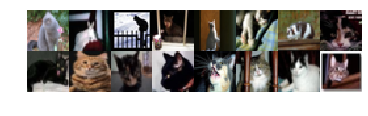

In [11]:
fig, axs = plt.subplots(2, 8, gridspec_kw={'hspace': 0, 
                                           'wspace': 0, 
                                           'top': .41})

for i in range(images_to_sample):
    if i <= 7:
        axs[0, i].imshow(diverse_images_edited[i, :, :, :])
        axs[0, i].axis('off')
    else:
        axs[1, i - 8].imshow(diverse_images_edited[i, :, :, :])
        axs[1, i - 8].axis('off')